# H1N1 & Seasonal Flu Vaccine - Predictive Modeling Project

## Data Understanding

In [192]:
# Imports

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.utils import resample
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

In [193]:
# Reading in training data

h1n1_train = pd.read_csv('./data/h1n1_training_data.csv')
h1n1_train.to_csv()
h1n1_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [194]:
h1n1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [195]:
# Reading in training label data 

training_labels = pd.read_csv('./data/training_labels.csv')

training_labels.to_csv()

training_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [196]:
# Checking for duplicates in labels df

training_labels.nunique()

respondent_id       26707
h1n1_vaccine            2
seasonal_vaccine        2
dtype: int64

In [197]:
# Merging labels and training features dataset 

vaccine_data = training_labels.merge(h1n1_train,how = 'left',left_on = 'respondent_id',right_on = 'respondent_id')

In [198]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

### Note: 
- large null values in health insurance, employement_industry, employment_occupation 
- survey allows for "don't know" and "refused to answer" choices
- assuming these null values are related to those options, I am going to

In [199]:
for row in vaccine_data:
    print(vaccine_data[row].value_counts())

2047     1
7657     1
3371     1
13612    1
15661    1
        ..
12979    1
2740     1
693      1
6838     1
0        1
Name: respondent_id, Length: 26707, dtype: int64
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64
1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64
0.0    1

In [200]:
vaccine_data['health_insurance'].value_counts()


1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [201]:
# Filling in health insurance with 3rd option to represent dont know/refused to answer 

vaccine_data['health_insurance'].fillna(value=2,inplace=True)


In [202]:
# Dropping irrelevant columns: respondent_id, seas-opinion 

vaccine_data.drop(columns=['respondent_id','doctor_recc_seasonal','opinion_seas_vacc_effective'\
                          ,'opinion_seas_risk','opinion_seas_sick_from_vacc'],inplace=True)

In [203]:
# Checking for class imbalance in target 

vaccine_data['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

**Note:** There is imbalance in the H1N1 target. Will need to use SMOTE to oversample the minority class

In [204]:
# Defining function to plot relevant columns against target

def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (vaccine_data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

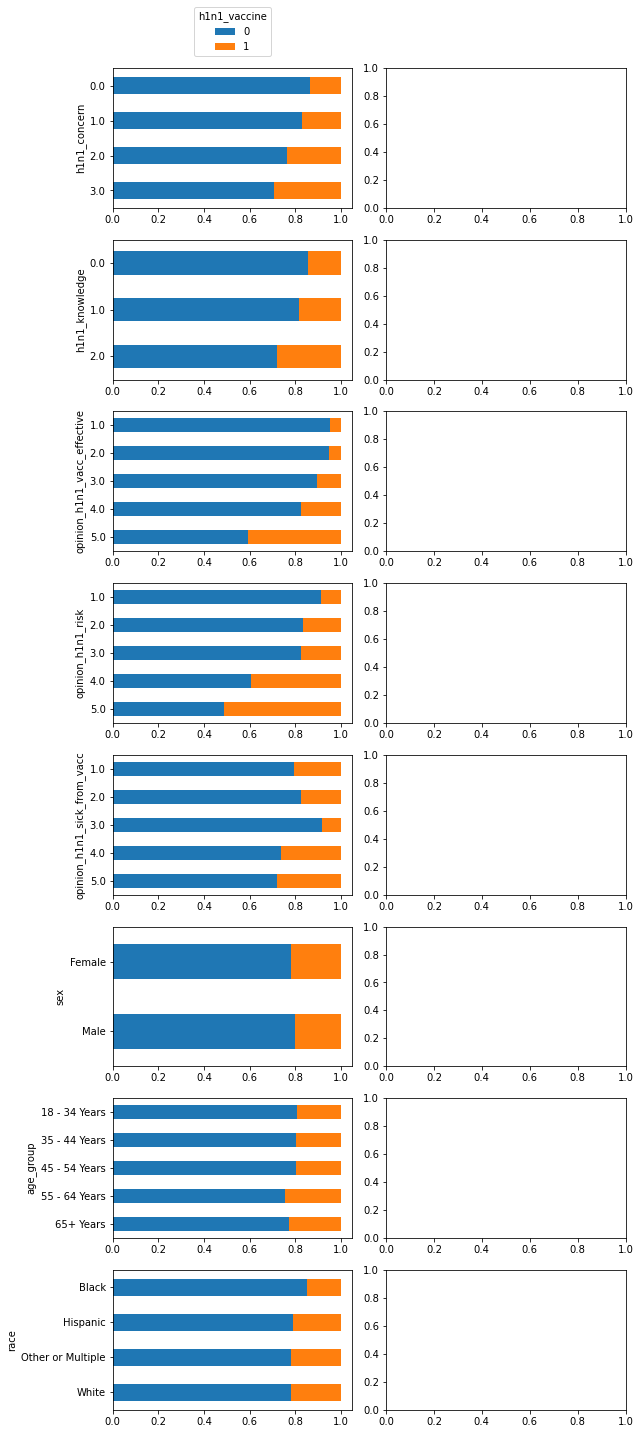

In [205]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2,  figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', vaccine_data,ax=ax[idx, 0]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)

fig.tight_layout()

## Identifying Predictors and Targets

In [281]:
# Isolating numeric columns
numeric_cols = vaccine_data.columns[vaccine_data.dtypes != "object"].values

numeric_data = vaccine_data[numeric_cols]

In [282]:
# Identifying Predictors and Targets from numeric columns

X = numeric_data.drop(columns=['h1n1_vaccine'])
y = vaccine_data['h1n1_vaccine']

## Setting up train-test split

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,random_state=42)

## Prepare Cross Validation Function for Model Testing

In [284]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

## Model 1 - Dummy Model

Using a dummy model to figure out baseline model performance for comparison later 

In [285]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = 'most_frequent')

In [286]:
dummy_model.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [287]:
dummy_cv = ModelWithCV(dummy_model, model_name='dummy_model', X=X_train, y=y_train)

CV Results for `dummy_model` model:
            0.78747 ± 0.00023 accuracy
        


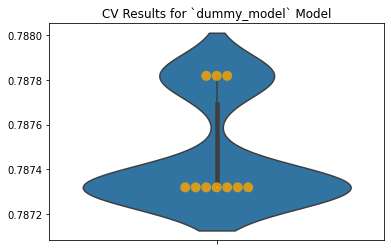

In [288]:
dummy_cv.print_cv_summary()
fig, ax = plt.subplots()

dummy_cv.plot_cv(ax=ax);

## Model 2 - Logistic Regression

In [289]:
log_scaler = StandardScaler()

# Fit and transform train, transform test

X_train_scaled = log_scaler.fit_transform(X_train)
X_test_scaled = log_scaler.transform(X_test)

In [290]:
# Using SimpleImputer to deal with null values not addressed yet

from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='median')

numeric_imputer = numeric_imputer.fit(X_train_scaled)

X_train_scaled = numeric_imputer.transform(X_train_scaled)


In [291]:
# Using SMOTE to deal with imbalanced target 

from imblearn.over_sampling import SMOTE

# Create the oversampler object

sm = SMOTE(random_state = 42)

X_train_scaled, y_train = sm.fit_resample(X_train_scaled,y_train)

In [292]:
log_model = LogisticRegression(
            C=1e3,            
            max_iter=1e3,      # Ensure we eventually reach a solution
            solver='lbfgs',   
            multi_class='ovr' 
)

In [293]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1000.0, max_iter=1000.0, multi_class='ovr')

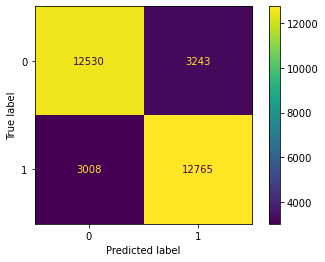

In [294]:
plot_confusion_matrix(log_model,X_train_scaled,y_train);

In [295]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_model,X_train_scaled,y_train,cv=3)

cv_scores

array([0.79079498, 0.80599144, 0.80675226])

In [296]:
# Preprocessing for test

X_test_scaled = numeric_imputer.transform(X_test_scaled)

In [297]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


y_pred_test = log_model.predict(X_test_scaled)

model_accuracy = accuracy_score(y_test,y_pred_test)
model_recall = recall_score(y_test,y_pred_test)
model_precision = precision_score(y_test,y_pred_test)
model_f1 = f1_score(y_test,y_pred_test)


print(f"""\
Accuracy:{model_accuracy:1.2f} ,Recall:{model_recall:1.2f}, Precision:{model_precision:1.2f}, F1:{model_f1:1.2f}\
""") 

Accuracy:0.80 ,Recall:0.79, Precision:0.52, F1:0.63


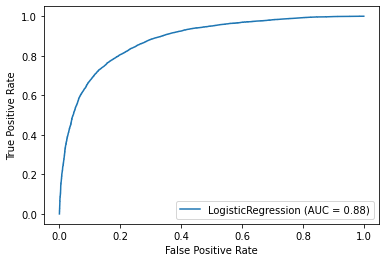

In [298]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_model, X_train_scaled, y_train)

In [299]:
baseline_logreg_results = ModelWithCV(
                        model=log_model,
                        model_name='log_model',
                        X=X_train_scaled, 
                        y=y_train
)

CV Results for `log_model` model:
            0.80178 ± 0.00878 accuracy
        


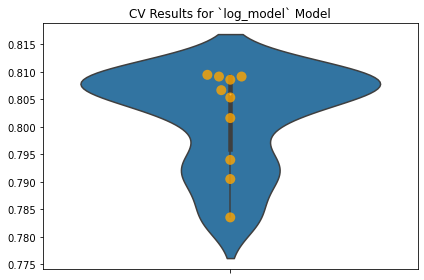

In [300]:
import seaborn as sns

# Saving variable for convenience
model_results = baseline_logreg_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

## Trying Different Models 

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### KNN 

In [224]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [225]:
knn_model.score(X_train_scaled,y_train)

0.9045520826729221

In [265]:
knn_results = ModelWithCV(
                        model=knn_model,
                        model_name='knn_model',
                        X=X_train_scaled, 
                        y=y_train
)

CV Results for `knn_model` model:
            0.85868 ± 0.01239 accuracy
        


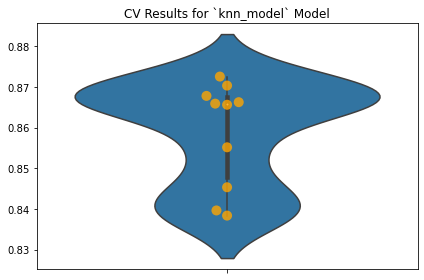

In [266]:
# Saving variable for convenience
model_results = knn_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [267]:
# Decreasing k 

knn3 = KNeighborsClassifier(n_neighbors=3)

knn3.fit(X_train_scaled,y_train)

knn3.score(X_train_scaled,y_train)

0.9341596398909529

In [268]:
knn3_results = ModelWithCV(
                        model=knn3,
                        model_name='knn3_model',
                        X=X_train_scaled, 
                        y=y_train
)

CV Results for `knn3_model` model:
            0.87431 ± 0.01061 accuracy
        


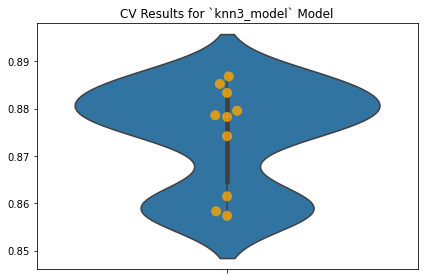

In [269]:
# Saving variable for convenience
model_results = knn3_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

In [273]:
# Increasing k

knn2 = KNeighborsClassifier(n_neighbors=5)

knn2.fit(X_train_scaled,y_train)

knn2.score(X_train_scaled,y_train)

0.9045520826729221

In [275]:
knn5_results = ModelWithCV(
                        model=knn2,
                        model_name='knn5_model',
                        X=X_train_scaled, 
                        y=y_train
)

CV Results for `knn5_model` model:
            0.85868 ± 0.01239 accuracy
        


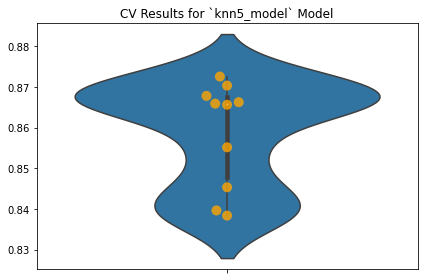

In [276]:
# Saving variable for convenience
model_results = knn5_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

#### Observations:
- It looks like all three knn models are overfitting, will need to tune hyperparameters to adjust"

### Decision Tree

In [277]:
ct = DecisionTreeClassifier(random_state=42)

ct.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [278]:
ct.score(X_train_scaled, y_train)

0.9932162556267039

In [279]:
dt_results = ModelWithCV(
                        model=ct,
                        model_name='dt_model',
                        X=X_train_scaled, 
                        y=y_train
)

CV Results for `dt_model` model:
            0.86268 ± 0.08339 accuracy
        


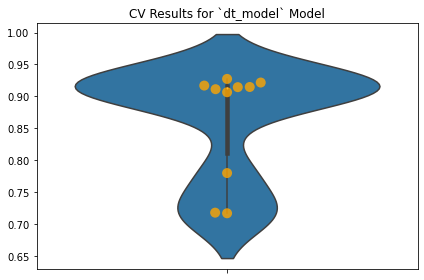

In [280]:
# Saving variable for convenience
model_results = dt_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()